In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import ndimage

In [85]:
def detect_blobs(img, threshold=50):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (17,17), 3)
    img[img >= threshold] = 200
    img[img < threshold] = 0
    
    bd_params = cv2.SimpleBlobDetector_Params()
    #bd_params.thresholdStep = 1
    bd_params.minThreshold = 150
    bd_params.maxThreshold = 250
    bd_params.filterByColor = False
    bd_params.filterByCircularity = False
    bd_params.filterByInertia = False
    bd_params.filterByConvexity = False
    detector = cv2.SimpleBlobDetector_create(bd_params)
    keypoints = detector.detect(img)
    
    return keypoints

def detect_ROI_around_blob(img, threshold=50):
    keypoints = detect_blobs(img, threshold)
    if len(keypoints) > 0:
        max_kp = max(keypoints, key=lambda kp: kp.size)
        ctr = [max_kp.pt[0], max_kp.pt[1]]
        radius = max_kp.size
        
        return {
            'left': int(ctr[0] - radius),
            'bottom': int(ctr[1] - radius),
            'width': int(radius * 2) + 1,
            'height': int(radius * 2) + 1,
            'right': int(ctr[0] - radius) + int(radius * 2) + 1,
            'top': int(ctr[1] - radius) + int(radius * 2) + 1
            
        }
    else:
        return None

Keypoint detected at (468.215698, 1051.067261)


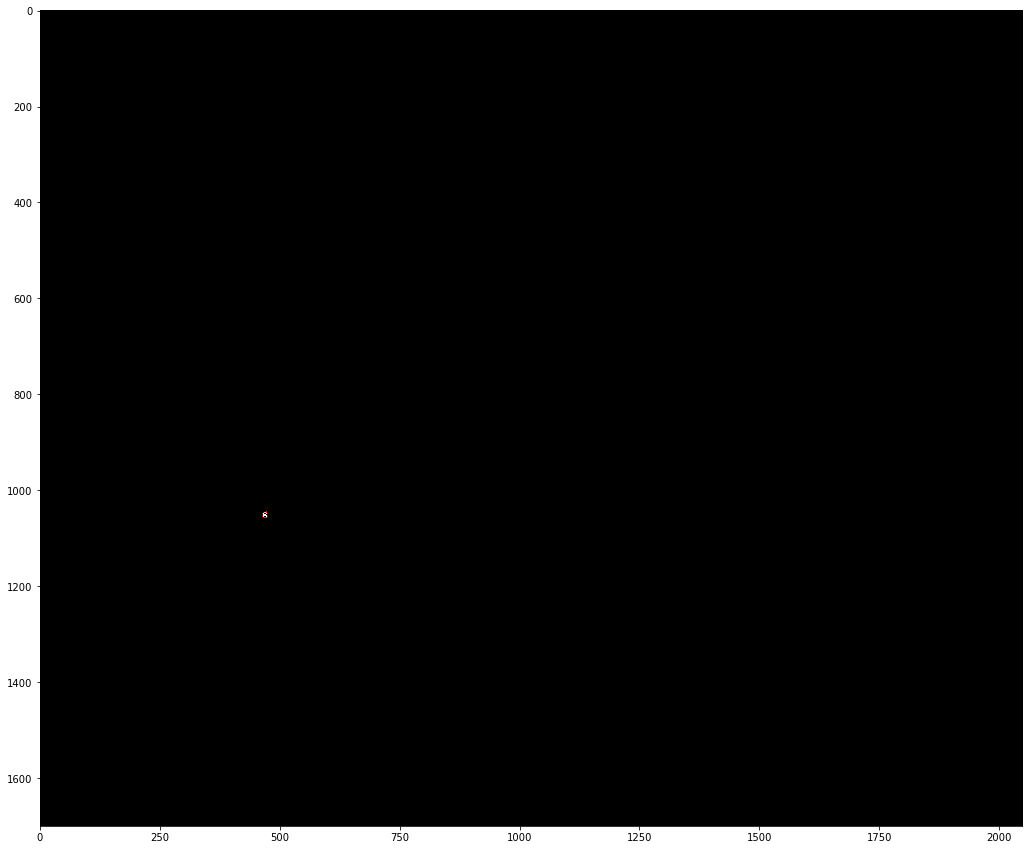

In [86]:
tresh1_path = "tresh1.png"
img = ndimage.imread(tresh1_path)
keypoints = detect_blobs(img)

for kp in keypoints:
    print("Keypoint detected at (%f, %f)" % (kp.pt[0], kp.pt[1]))

im_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=[30, 15])
plt.imshow(im_with_keypoints)
cv2.imwrite("im_with_keypoints.png", im_with_keypoints)
plt.show()

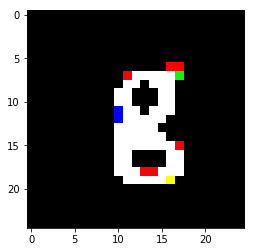

In [87]:
rect = detect_ROI_around_blob(img, threshold=50)
sub_img = img[rect['bottom']:rect['top'], rect['left']:rect['right']]

plt.imshow(sub_img)
plt.show()

# Tests

In [ ]:
tresh1 = ndimage.imread(tresh1_path)
plt.figure(figsize=[30, 15])
plt.imshow(tresh1)
plt.show()

In [ ]:
blurred_tresh1 = cv2.GaussianBlur(tresh1, (9, 9), 3)
plt.figure(figsize=[30, 15])
plt.imshow(blurred_tresh1)
plt.show()

In [ ]:
tresh1_gray = cv2.cvtColor(blurred_tresh1, cv2.COLOR_BGR2GRAY)

bd_params = cv2.SimpleBlobDetector_Params()
bd_params.minThreshold = 150
bd_params.maxThreshold = 256
bd_params.thresholdStep = 20
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(tresh1_gray)
print(keypoints)
im_with_keypoints = cv2.drawKeypoints(tresh1, keypoints, None, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[30, 15])
plt.imshow(im_with_keypoints)
cv2.imwrite("im_with_keypoints.png", im_with_keypoints)
plt.show()